Попытаюсь написать описать пример из статьи.

Introduction

The industry standard for measuring page load time is quantiles such as 90-th percentile or p90, and 50-th percentile or p50. p90 monitors tail performance and is the ultimate performance metric to optimize for, while p50 monitors overall performance.  // почему? 


Before implementing the quantile metrics A/B testing solution described in this work, average page load time was used as a surrogate for p50, but there was no good surrogate for p90, and experimenters did not have the capability to measure how their feature impacts members’ site speed experience.

Опыт в каждом варианте влияет на q-й квантиль времени загрузки страницы. Чтобы измерить это влияние и вычислить статистическую значимость, нам нужны оценки количества выборки и стандартного отклонения квантиля выборки в каждом варианте. При увеличении одного варианта, предположим, что в этом варианте есть:

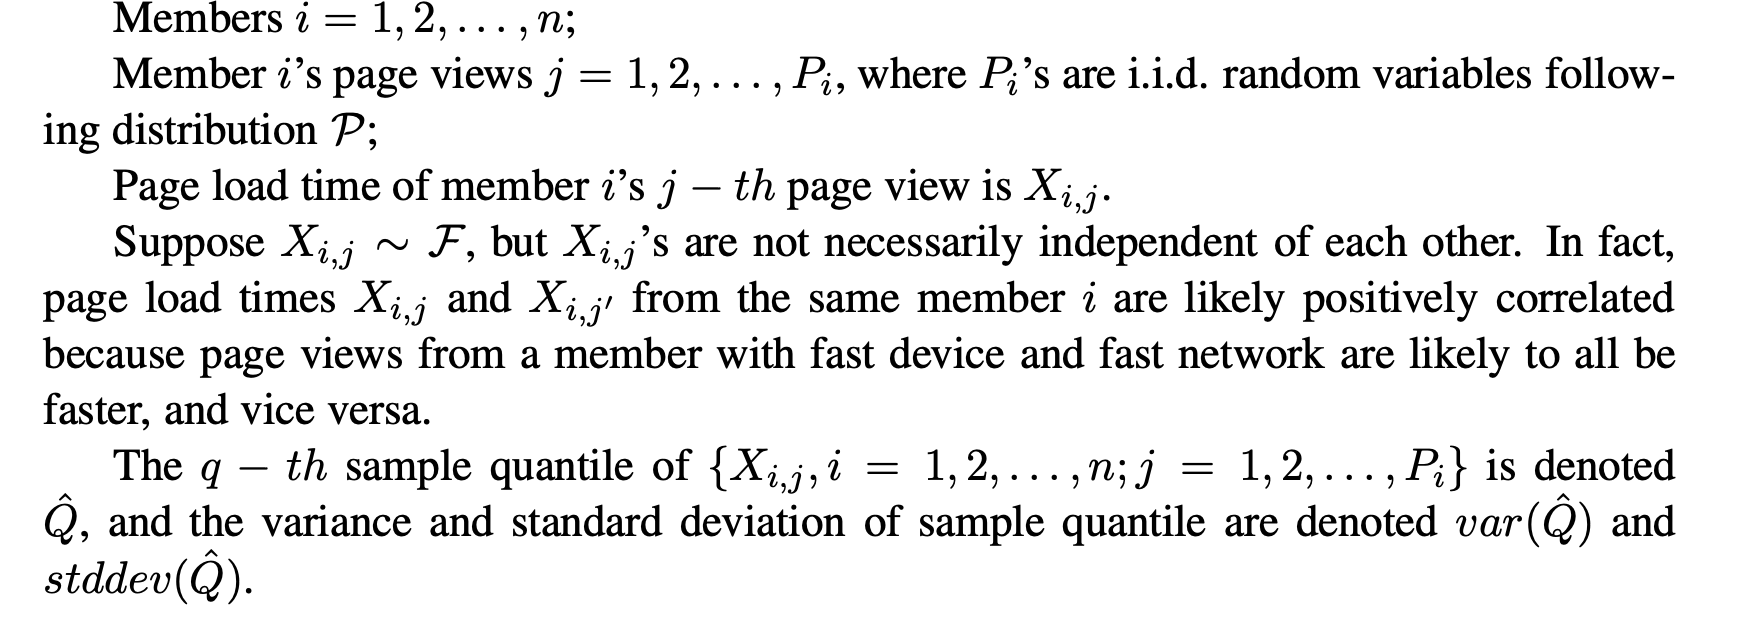

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Задайте значения n и Pi
n = 10  # замените на нужное значение

#пусть P это нормальное расперделение 
P = np.random.normal(loc=5, scale=2, size=10)
print (P)

Pi = [round(num) for num in P]
print (Pi)

max = int (np.max(Pi)) 
# Создайте пустую матрицу Xij
X = np.zeros((n,max))

# Заполните матрицу Xij значениями Xi,j  
for i in range(n):
    for j in range(Pi[i]):
        X[i, j] = np.random.random_integers(0,100)

X

[4.20948434 2.78828514 7.13901965 4.17404747 7.36375969 7.69759603
 8.08387334 8.06812742 2.98987091 7.07371863]
[4, 3, 7, 4, 7, 8, 8, 8, 3, 7]


/var/folders/bl/wg6s05_j4djfq_q72ymhkpsc0000gp/T/ipykernel_47743/2127778391.py:22: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  X[i, j] = np.random.random_integers(0,100)


array([[74.,  4., 26., 67.,  0.,  0.,  0.,  0.],
       [21., 32., 49.,  0.,  0.,  0.,  0.,  0.],
       [90., 18., 43., 73., 87., 34., 23.,  0.],
       [15., 95., 76., 63.,  0.,  0.,  0.,  0.],
       [37., 91., 50., 76., 41., 26.,  6.,  0.],
       [79., 63., 72., 66., 78., 44.,  4., 31.],
       [44., 63., 21., 77., 65., 32., 98., 15.],
       [81.,  9., 88., 10., 65., 62.,  9., 73.],
       [67., 94., 17.,  0.,  0.,  0.,  0.,  0.],
       [82., 99., 38., 47., 38., 84., 26.,  0.]])

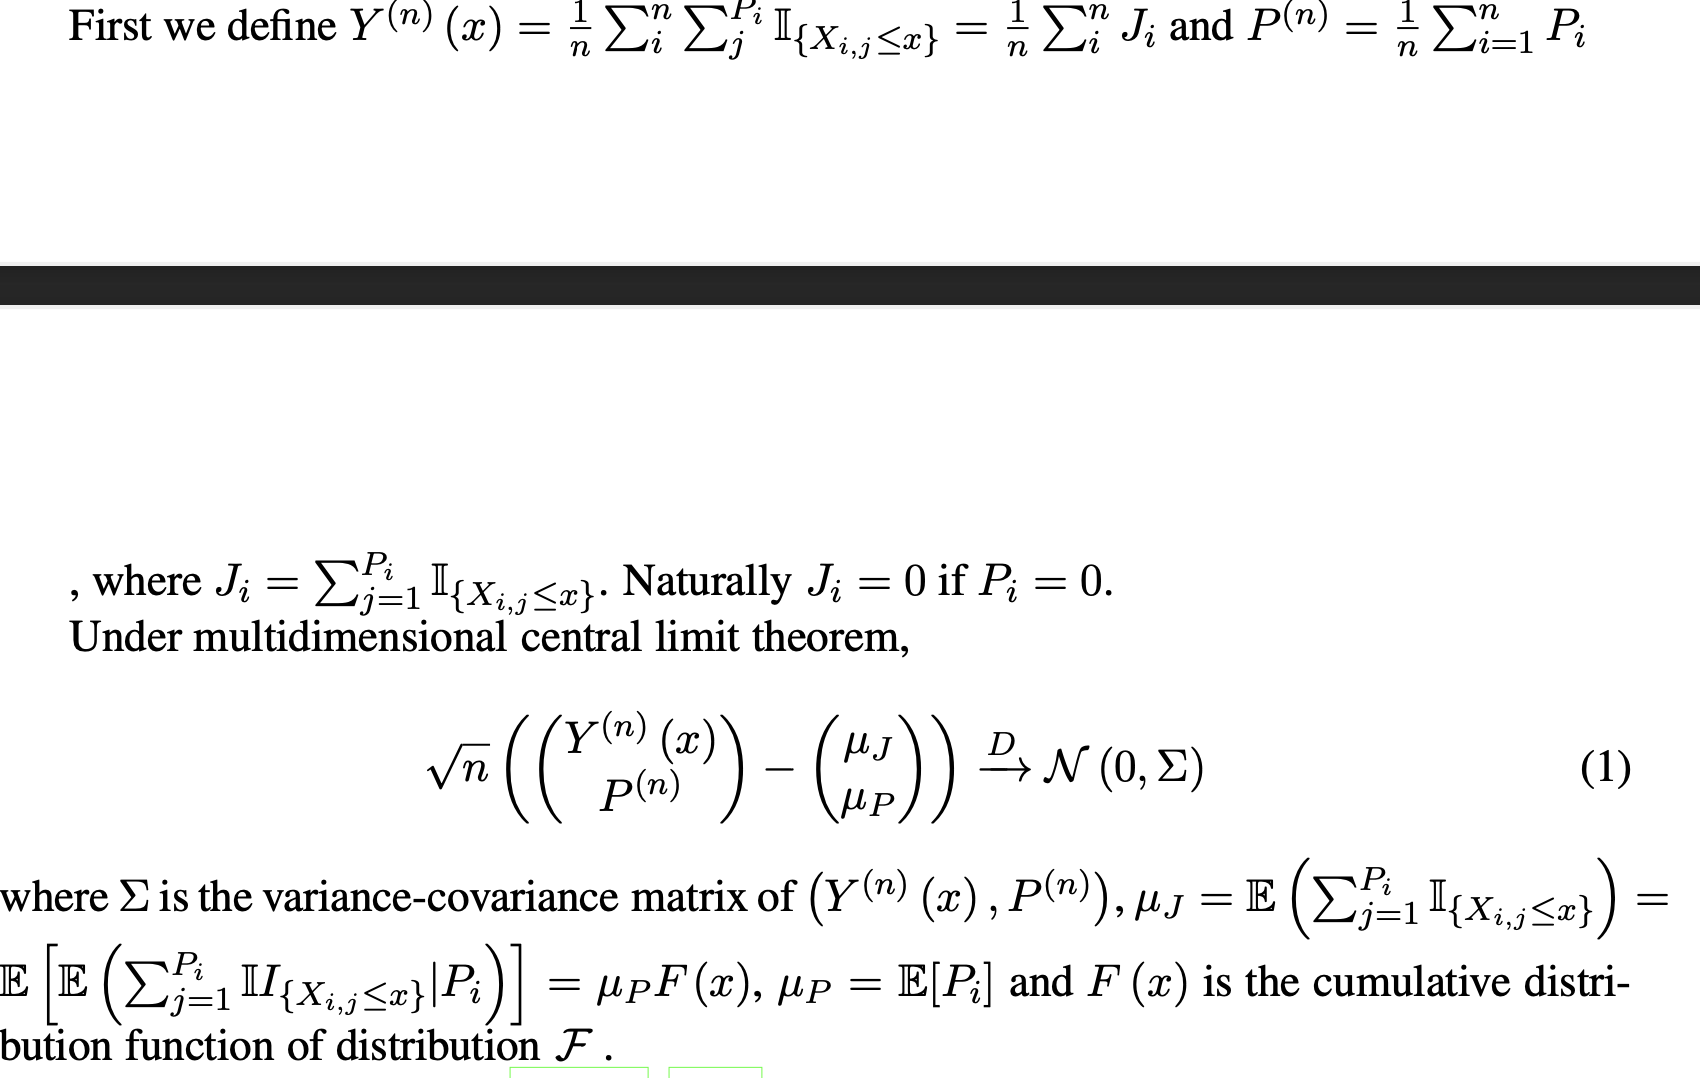

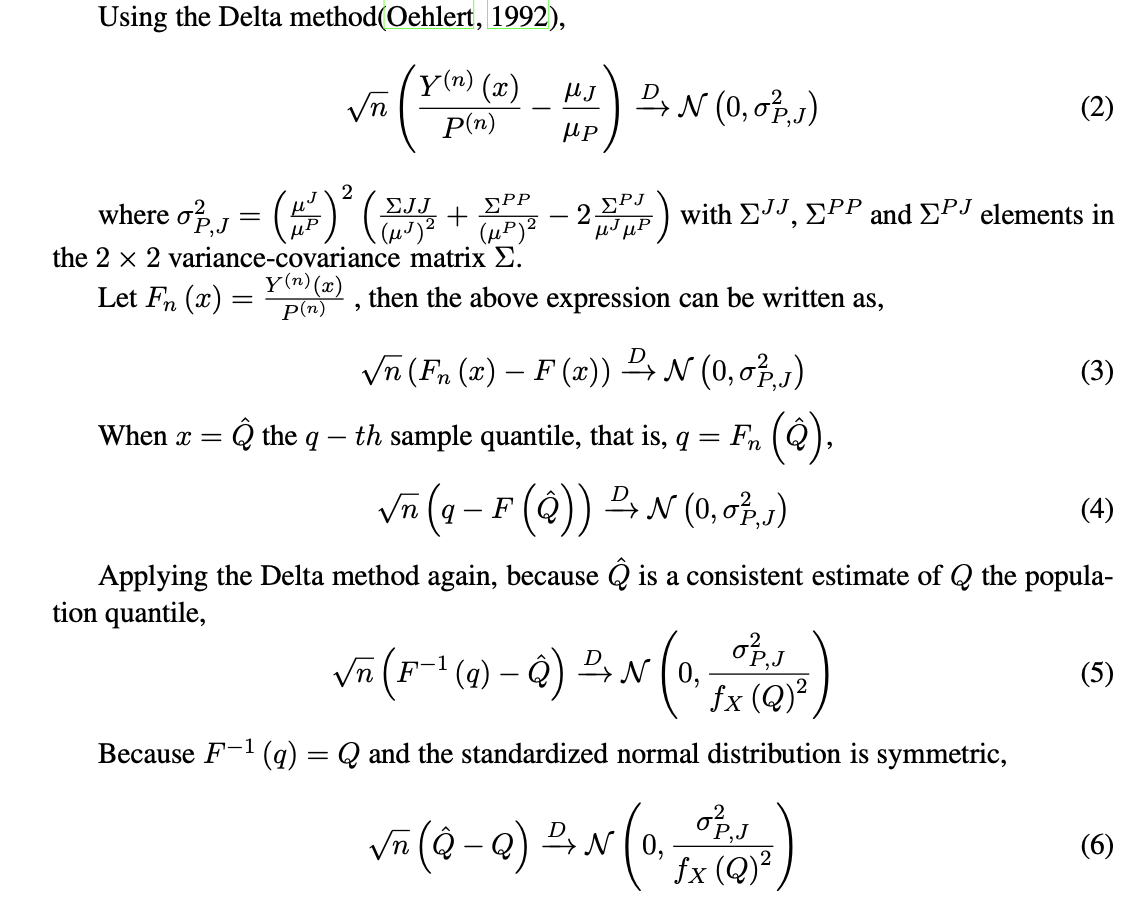

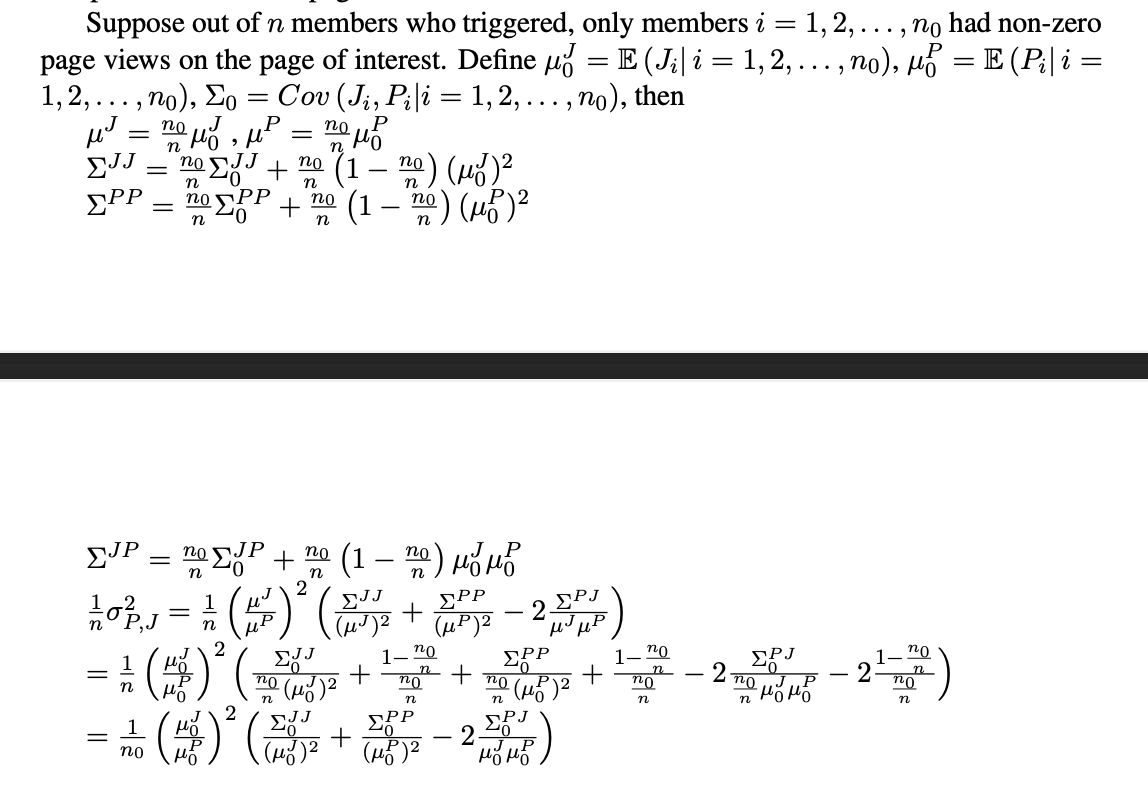

In [27]:

n0 = np.count_nonzero(Pi)
n = len(Pi)
# НайCNдите μP0 - среднее значение Pi
mu_P0 = np.mean(Pi)

print (mu_P0, '\n')
#? что такое MuJ0, пока тоже абстрактное

mu_J0 = np.random.random_integers(1,10)

#? соотв что такое I

#Ji пока чем-то заменю
Ji = np.random.normal(loc=5, scale=2, size=10)

EJJ_0 = np.cov(Ji,Ji)
EPP_0 = np.cov(Pi,Pi)
EJP_0 = np.cov(Ji,Pi)

print (type(EJJ_0))
print (EJJ_0, '\n')
print (EPP_0, '\n')
print (EJP_0, '\n')

5.9 

<class 'numpy.ndarray'>
[[3.6357852 3.6357852]
 [3.6357852 3.6357852]] 

[[4.54444444 4.54444444]
 [4.54444444 4.54444444]] 

[[3.6357852  0.75708901]
 [0.75708901 4.54444444]] 



/var/folders/bl/wg6s05_j4djfq_q72ymhkpsc0000gp/T/ipykernel_47743/2981102981.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  mu_J0 = np.random.random_integers(1,10)


? что такое Ji по своей сути (соотв что такое I [I{Xij < x>} если это определение, тогда что такое x])

In [43]:
def divide_matrix(matrix, number):
    result = []
    for row in matrix:
        divided_row = [element / number for element in row]
        result.append(divided_row)
    return result

def sum_of_matrices(matrix1, matrix2, matrix3):
    rows = len(matrix1)
    cols = len(matrix1[0])

    result_matrix = [[0 for _ in range(cols)] for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            result_matrix[i][j] = matrix1[i][j] + matrix2[i][j] + matrix3[i][j]

    return result_matrix


se = divide_matrix(sum_of_matrices(divide_matrix(EJJ_0, mu_J0**2) , divide_matrix(EPP_0, mu_P0**2) , divide_matrix(EJP_0,mu_J0 * mu_P0/2)),n0 * ((mu_J0/mu_P0)**(-2) ))
se
#se?
#print (stats.norm.interval(0.90, loc = hat, scale = se))
#print (stats.norm.interval(0.99, loc = hat, scale = se))

[[0.02444166502577368, 0.016031760839457607],
 [0.016031760839457607, 0.027096247770444584]]